Step 1: Data Processing
there are 4 sub steps.

1. Load and clean the purchase order data
2. Handle multilingual text appropriately
3. Perform any necessary preprocessing steps
4. Document each cleaning decision and why you made it

In [54]:
# Test all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import Counter
import sys

print("✅ All libraries imported successfully!")
print(f"Python executable: {sys.executable}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
Python executable: d:\work\Aajil\Purchase Order Item Categorization Challenge\aajil-purchase-order-categorization\venv\Scripts\python.exe
Pandas version: 2.3.2
Seaborn version: 0.13.2


## 1.1 Load and clean the purchase order data
My goal is to understand the structure, quality, and challenges in this purchase order dataset before making any categorization decisions.

### Key Questions I Want to Answer:
1. What does the data structure look like?
2. How messy is the data?
3. What languages are present (English/Arabic)?
4. What patterns exist in item descriptions?
5. What data quality issues need addressing?

In [55]:
# Load the dataset
df = pd.read_excel(r'D:\work\Aajil\Purchase Order Item Categorization Challenge\aajil-purchase-order-categorization\data\purchase-order-items.xlsx')

print("=== BASIC DATASET INFO ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== BASIC DATASET INFO ===
Dataset shape: (3150, 11)
Columns: ['Item ID', 'Item Name', 'Quantity', 'Total Bcy', 'Sub Total Bcy', 'Purchase Order ID', 'Product ID', 'Currency Code', 'Account ID', 'Tax ID', 'Project ID']
Data types:
Item ID                int64
Item Name             object
Quantity             float64
Total Bcy            float64
Sub Total Bcy        float64
Purchase Order ID      int64
Product ID           float64
Currency Code         object
Account ID             int64
Tax ID               float64
Project ID           float64
dtype: object
Memory usage: 0.73 MB


In [56]:
print("=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== LAST 5 ROWS ===")
display(df.tail())

print("\n=== RANDOM SAMPLE ===")
display(df.sample(5))

=== FIRST 5 ROWS ===


,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN



=== LAST 5 ROWS ===


,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.0,69000.0,69000.0,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.0,69000.0,69000.0,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3149,3263831000018023011,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000018023005,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN



=== RANDOM SAMPLE ===


,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
347,3263831000000948071,16.0 mm Black Deformed Straight Bar G60 - 12M ...,60.0,142800.0,142800.0,3263831000000948061,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
2026,3263831000012322011,ITTEFAQ DEFORMED BARS 14 MM * 12 M - KSA,60.0,136860.0,136860.0,3263831000012322007,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
2310,3263831000016759041,PPR ELBOW90 DEG 40MM,150.0,90.0,90.0,3263831000016759017,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
2964,3263831000025485030,PETROMIN SUPER HD 40 20W-40 CH-4,5.0,7425.0,7425.0,3263831000025485016,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3066,3263831000007991015,حديد تسليح وطني 12 مم*12متر,20.0,43000.0,43000.0,3263831000007991001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


In [57]:
print("=== DATA QUALITY ASSESSMENT ===")
print("Missing values per column:")
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100
quality_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percentages
})
display(quality_df[quality_df['Missing Count'] > 0])

print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Unique rows: {len(df)} - {df.duplicated().sum()} = {len(df) - df.duplicated().sum()}")

=== DATA QUALITY ASSESSMENT ===
Missing values per column:


,Missing Count,Missing %
Item Name,240,7.619048
Product ID,240,7.619048
Tax ID,65,2.063492
Project ID,3150,100.000000



Duplicate rows: 0
Unique rows: 3150 - 0 = 3150


Observations:

Data Quality Issues I Found:
- There is 240 missing [Item Name , Product ID] around 7.6% of the data.
- all rows are unique. no Duplicates to remove.
- No need for Project ID. all are not found.

Initial Questions/Concerns:
- What is the relation between Total Bcy and Sub Total Bcy?
- what is the difference between product ID and Item ID?
- are every item does not have name? will not have product Id?
- does product ID and Item ID follow any specific pattern? if yes, we can deduce the missing 240 and use them in categorization. 

## 1.3 Perform any necessary preprocessing steps

- remove unnecessary attributes from the data.
- add new columns to handle currency and one item price 

In [58]:
# Drop 'Project ID' column as it has all missing values
df = df.drop(columns=['Project ID'])

# Check if all values in 'Currency Code' are 'SAR'
if df['Currency Code'].nunique() == 1 and df['Currency Code'].iloc[0] == 'SAR':
    df = df.drop(columns=['Currency Code'])
    print("Dropped 'Currency Code' column (all values are 'SAR').")
else:
    print("Non-SAR values found in 'Currency Code':")
    print(df['Currency Code'].value_counts())

# Find rows where 'Total Bcy' != 'Sub Total Bcy'
diff_mask = df['Total Bcy'] != df['Sub Total Bcy']
diff_rows = df[diff_mask]
print(f"Rows where 'Total Bcy' != 'Sub Total Bcy' (count: {diff_rows.shape[0]}):")
display(diff_rows)

Non-SAR values found in 'Currency Code':
Currency Code
SAR    3085
USD      65
Name: count, dtype: int64
Rows where 'Total Bcy' != 'Sub Total Bcy' (count: 15):


,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID
218,3263831000000641063,NaN,2.0,395.22,403.29,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
219,3263831000000641071,NaN,96.0,13474.96,13749.96,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
220,3263831000000641079,NaN,160.0,5193.84,5299.84,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
221,3263831000000641087,NaN,315.0,40561.20,41388.98,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
222,3263831000000641065,NaN,22.0,3905.54,3985.24,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
223,3263831000000641073,NaN,96.0,17293.79,17646.72,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
224,3263831000000641081,NaN,450.0,34054.02,34749.00,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
225,3263831000000641089,NaN,315.0,25154.11,25667.46,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
226,3263831000000641069,NaN,96.0,1937.29,1976.83,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18
227,3263831000000641077,NaN,260.0,10210.14,10418.51,3263831000000641061,NaN,SAR,3263831000000034003,3.263831e+18


In [59]:
# Calculate the percentage absolute difference for the 15 rows
diff_rows['Abs_Diff_% to Total Bcy'] = (diff_rows['Total Bcy'] - diff_rows['Sub Total Bcy']).abs() / diff_rows['Total Bcy'] * 100
diff_rows['Abs_Diff_% to Sub Total Bcy'] = (diff_rows['Total Bcy'] - diff_rows['Sub Total Bcy']).abs() / diff_rows['Sub Total Bcy'] * 100
print(diff_rows[['Total Bcy', 'Sub Total Bcy', 'Abs_Diff_% to Total Bcy' , 'Abs_Diff_% to Sub Total Bcy']])
print("the mean percentage of different between Total Bcy and Sub Total BCY = ", diff_rows['Abs_Diff_% to Total Bcy'].mean())

     Total Bcy  Sub Total Bcy  Abs_Diff_% to Total Bcy  \
218     395.22         403.29                 2.041901   
219   13474.96       13749.96                 2.040822   
220    5193.84        5299.84                 2.040879   
221   40561.20       41388.98                 2.040817   
222    3905.54        3985.24                 2.040691   
223   17293.79       17646.72                 2.040790   
224   34054.02       34749.00                 2.040816   
225   25154.11       25667.46                 2.040820   
226    1937.29        1976.83                 2.040995   
227   10210.14       10418.51                 2.040814   
228    1447.57        1477.11                 2.040661   
229    1207.39        1232.03                 2.040766   
230   12329.87       12581.50                 2.040816   
231   41899.72       42754.82                 2.040825   
232   97862.56       99859.76                 2.040821   

     Abs_Diff_% to Sub Total Bcy  
218                     2.001041  
2

C:\Users\LOQ\AppData\Local\Temp\ipykernel_12632\1452049836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_rows['Abs_Diff_% to Total Bcy'] = (diff_rows['Total Bcy'] - diff_rows['Sub Total Bcy']).abs() / diff_rows['Total Bcy'] * 100
C:\Users\LOQ\AppData\Local\Temp\ipykernel_12632\1452049836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_rows['Abs_Diff_% to Sub Total Bcy'] = (diff_rows['Total Bcy'] - diff_rows['Sub Total Bcy']).abs() / diff_rows['Sub Total Bcy'] * 100


- the rows is concective. it means in some time there was a tax of adiitional fee applyied to the Total Bcy.
- the perecnage of the difference with respect to Sub Total Bcy is different but with respect to Total Bcy is almost fixed and it was 2.04% 
- it seems that there was Tax applied on those items which are concsuctive = 2.04% of the Toatal Bcy.

In [60]:
# Find indices where 'Item Name' is missing
missing_item_name_idx = df[df['Item Name'].isnull()].index

# Find indices where 'Product ID' is missing
missing_product_id_idx = df[df['Product ID'].isnull()].index

# Check if both sets are equal
if set(missing_item_name_idx) == set(missing_product_id_idx):
    print("All rows missing 'Item Name' are the same as those missing 'Product ID'.")
    print("Indices:", list(missing_item_name_idx))
else:
    # Find rows missing only one of the two attributes
    only_item_name = set(missing_item_name_idx) - set(missing_product_id_idx)
    only_product_id = set(missing_product_id_idx) - set(missing_item_name_idx)
    if only_item_name:
        print("Rows missing only 'Item Name':")
        display(df.loc[list(only_item_name), ['Item Name', 'Product ID']])
    if only_product_id:
        print("Rows missing only 'Product ID':")
        display(df.loc[list(only_product_id), ['Item Name', 'Product ID']])

All rows missing 'Item Name' are the same as those missing 'Product ID'.
Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 20

In [61]:
# Check if 'Account ID' column has a single unique value
if df['Account ID'].nunique() == 1:
    df = df.drop(columns=['Account ID'])
    print("Dropped 'Account ID' column (all values are identical).")
else:
    print("Value counts for 'Account ID':")
    print(df['Account ID'].value_counts())

# Check if 'Tax ID' column has a single unique value (excluding NaN)
if df['Tax ID'].nunique(dropna=True) == 1:
    df = df.drop(columns=['Tax ID'])
    print("Dropped 'Tax ID' column (all values are identical or NaN).")
else:
    print("Value counts for 'Tax ID':")
    print(df['Tax ID'].value_counts())

# Only search for minimal value counts if columns exist
if 'Account ID' in df.columns:
    account_id_min_count = df['Account ID'].value_counts().min()
    min_account_ids = df['Account ID'].value_counts()
    min_account_ids = min_account_ids[min_account_ids == account_id_min_count].index
    print("\nRows with minimal Account ID value counts:")
    display(df[df['Account ID'].isin(min_account_ids)])

if 'Tax ID' in df.columns:
    tax_id_min_count = df['Tax ID'].value_counts().min()
    min_tax_ids = df['Tax ID'].value_counts()
    min_tax_ids = min_tax_ids[min_tax_ids == tax_id_min_count].index
    print("\nRows with minimal Tax ID value counts:")
    display(df[df['Tax ID'].isin(min_tax_ids)])


Value counts for 'Account ID':
Account ID
3263831000000034003    3149
3263831000000000409       1
Name: count, dtype: int64
Dropped 'Tax ID' column (all values are identical or NaN).

Rows with minimal Account ID value counts:


,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID
510,3263831000003059878,NaN,1.0,7.0,7.0,3263831000002728005,NaN,SAR,3263831000000000409


In [62]:
# Print value counts of Product ID (excluding NaN)
print("=== PRODUCT ID VALUE COUNTS ===")
print(df['Product ID'].value_counts(dropna=True))

# Get the top 3 most common Product IDs (excluding NaN)
top_3_product_ids = df['Product ID'].value_counts(dropna=True).index[:3]

for pid in top_3_product_ids:
    print(f"\n=== ITEM NAMES FOR TOP PRODUCT ID ({pid}) ===")
    item_names = df[df['Product ID'] == pid]['Item Name']
    print(item_names.value_counts())

=== PRODUCT ID VALUE COUNTS ===
Product ID
3.263831e+18    25
3.263831e+18    22
3.263831e+18    22
3.263831e+18    21
3.263831e+18    20
                ..
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
Name: count, Length: 896, dtype: int64

=== ITEM NAMES FOR TOP PRODUCT ID (3.263831000009356e+18) ===
Item Name
XT6N 800 Ekip Dip LS/I In=800 3p F F                          3
XT2N 160 TMA 80-800 3p F F                                    2
MS132-1.6 Manual Motor Starter Trip class 10, 1.0 ... 1.6A    1
EXT CT N XT5 320 A EKIP DIP IEC                               1
F204 AC-80/0,03 IEC                                           1
XT1N 160 TMD 40-450 3p F F                                    1
S203-C63                                                      1
OXS6X130 SHAFT                                                1
XT2S 160 Ekip LS/I In=160A 4pFF InN=100%                      1
EXT CT N XT5 400 A EKIP DIP IEC/UL                          

- it seems that Product ID has a dirrect relationship with Item Name because the same rows which miss Product ID is the same in which the Item Name.
- to investigate about it the top used Product ID, it seems to have multiple Item Name equivalent to it. 
- it makes sure that we can not rely much on Item Name as it might contain the same product but with different specifications.
- drop Tax ID because it has all the same value. also the Account ID has only one different value. even I can not drop it but it gives no additional information

In [63]:
# Create 'price_in_SAR' column based on 'Currency Code'
df['Sub_Total_in_SAR'] = np.where(
    df['Currency Code'] == 'SAR',
    df['Sub Total Bcy'],
    np.where(df['Currency Code'] == 'USD', df['Sub Total Bcy'] * 3.75, np.nan)
)
df['Total_in_SAR'] = np.where(
    df['Currency Code'] == 'SAR',
    df['Total Bcy'],
    np.where(df['Currency Code'] == 'USD', df['Total Bcy'] * 3.75, np.nan)
)
print("Added 'Sub_Total_in_SAR' and 'Total_in_SAR' columns based on 'Currency Code'.")

Added 'Sub_Total_in_SAR' and 'Total_in_SAR' columns based on 'Currency Code'.


In [64]:
df = df.drop(columns=['Currency Code','Account ID','Total Bcy', 'Sub Total Bcy'])

In [65]:
df['Item price_in_SAR'] = df['Total_in_SAR'] / df['Quantity']
print("Added 'Item price_in_SAR' column based on 'Total_in_SAR' and 'Quantity'.")

Added 'Item price_in_SAR' column based on 'Total_in_SAR' and 'Quantity'.


In [66]:
print(df.head())

               Item ID Item Name  Quantity    Purchase Order ID  Product ID  \
0  3263831000000089042       NaN     75.21  3263831000000089040         NaN   
1  3263831000000089046       NaN     15.00  3263831000000089040         NaN   
2  3263831000000089044       NaN     50.00  3263831000000089040         NaN   
3  3263831000000092044       NaN     12.00  3263831000000092040         NaN   
4  3263831000000092052       NaN      2.00  3263831000000092040         NaN   

   Sub_Total_in_SAR  Total_in_SAR  Item price_in_SAR  
0         227510.25     227510.25             3025.0  
1          47250.00      47250.00             3150.0  
2         160000.00     160000.00             3200.0  
3          38280.00      38280.00             3190.0  
4           5900.00       5900.00             2950.0  


- remove the unneccasry attibutes from data
- adjust the currency to be all in SAR.
- add new column to represent Item price for one value of it

In [67]:
print("=== PURCHASE ORDER ID VALUE COUNTS ===")
print(df['Purchase Order ID'].value_counts())

=== PURCHASE ORDER ID VALUE COUNTS ===
Purchase Order ID
3263831000017363001    99
3263831000022471084    90
3263831000009330075    87
3263831000007223023    62
3263831000016759017    59
                       ..
3263831000000357772     1
3263831000000264047     1
3263831000000396132     1
3263831000000357709     1
3263831000024290031     1
Name: count, Length: 531, dtype: int64


In [68]:
print("=== PURCHASE ORDER ID VALUE COUNTS ===")
# Group by 'Purchase Order ID', count occurrences, and sum 'Sub_Total_in_SAR'
summary = df.groupby('Purchase Order ID').agg(
    Count=('Purchase Order ID', 'size'),
    Sub_Total_Bcy_Sum=('Sub_Total_in_SAR', 'sum')
).reset_index()

# Order by Sub_Total_Bcy_Sum descending
summary = summary.sort_values(by='Sub_Total_Bcy_Sum', ascending=False)

print(summary)

=== PURCHASE ORDER ID VALUE COUNTS ===
       Purchase Order ID  Count  Sub_Total_Bcy_Sum
235  3263831000006434024      2         2499000.00
274  3263831000007642121      3         2152200.00
325  3263831000010238175      9         1818000.00
312  3263831000009288003      2         1739500.00
484  3263831000021657041     12         1739131.81
..                   ...    ...                ...
469  3263831000020238065      3           11625.00
140  3263831000003518005      1            9418.72
155  3263831000003987128      2            9090.00
222  3263831000006020024     18            8754.56
141  3263831000003520028      1            3515.62

[531 rows x 3 columns]


In [69]:
# Calculate the total Sub Total Bcy sum for all orders
total_sub_total_bcy = summary['Sub_Total_Bcy_Sum'].sum()

# Add a percentage column to the summary DataFrame
summary['Percent_of_Total'] = (summary['Sub_Total_Bcy_Sum'] / total_sub_total_bcy) * 100

# Sort by Sub_Total_Bcy_Sum descending for better visualization
summary_sorted = summary.sort_values(by='Sub_Total_Bcy_Sum', ascending=False).reset_index(drop=True)

# Display the summary DataFrame
display(summary_sorted)

,Purchase Order ID,Count,Sub_Total_Bcy_Sum,Percent_of_Total
0,3263831000006434024,2,2499000.00,1.595687
1,3263831000007642121,3,2152200.00,1.374245
2,3263831000010238175,9,1818000.00,1.160848
3,3263831000009288003,2,1739500.00,1.110724
4,3263831000021657041,12,1739131.81,1.110488
...,...,...,...,...
526,3263831000020238065,3,11625.00,0.007423
527,3263831000003518005,1,9418.72,0.006014
528,3263831000003987128,2,9090.00,0.005804
529,3263831000006020024,18,8754.56,0.005590


In [70]:
# Create a DataFrame with top 5 Purchase Order IDs and their corresponding Item IDs as lists
top5_po_ids = summary_sorted['Purchase Order ID'].head(5)
top_5_order_Sub_Total_Bcy = pd.DataFrame({
    'Purchase Order ID': top5_po_ids.values,
    'Item IDs': [df[df['Purchase Order ID'] == po_id]['Item ID'].tolist() for po_id in top5_po_ids.values]
})

display(top_5_order_Sub_Total_Bcy)

,Purchase Order ID,Item IDs
0,3263831000006434024,"[3263831000006434028, 3263831000006434026]"
1,3263831000007642121,"[3263831000007642125, 3263831000007642127, 326..."
2,3263831000010238175,"[3263831000010238183, 3263831000010238191, 326..."
3,3263831000009288003,"[3263831000009288007, 3263831000009288005]"
4,3263831000021657041,"[3263831000021657047, 3263831000021657055, 326..."


In [71]:
print("=== ITEM ID VALUE COUNTS ===")
print(df['Item ID'].value_counts())

=== ITEM ID VALUE COUNTS ===
Item ID
3263831000018023011    1
3263831000000089042    1
3263831000000089046    1
3263831000000089044    1
3263831000000092044    1
                      ..
3263831000000099096    1
3263831000000099100    1
3263831000000099102    1
3263831000000099098    1
3263831000000097049    1
Name: count, Length: 3150, dtype: int64


In [72]:
# Extract 'Item ID' and 'Item price_in_SAR', sort descending by price
item_price_table = df[['Item ID', 'Item price_in_SAR']].sort_values(by='Item price_in_SAR', ascending=False)

# Display the table
display(item_price_table)

# Print statistical information about the price column
print("=== Statistical Information for 'Item price_in_SAR' ===")
print(item_price_table['Item price_in_SAR'].describe())

,Item ID,Item price_in_SAR
1347,3263831000006835381,1150000.00
1606,3263831000008812087,650000.00
1231,3263831000005875044,500000.00
1014,3263831000004552029,499000.00
2653,3263831000021510009,434782.61
...,...,...
869,3263831000004080069,0.07
1919,3263831000011266049,0.00
1924,3263831000011266055,0.00
1925,3263831000011266063,0.00


=== Statistical Information for 'Item price_in_SAR' ===
count    3.150000e+03
mean     4.455281e+03
std      3.399851e+04
min      0.000000e+00
25%      4.700000e+01
50%      4.289750e+02
75%      2.300000e+03
max      1.150000e+06
Name: Item price_in_SAR, dtype: float64


- All Item ID are unique but one order can take up to 99 Item. we calculate the total sum grouped by the orders to help find the best selling Items based on total money.
- there are some orders that make revenue more than 700 times of another orders.
- the feture of order ID has impact on the categorization

## 1.2 Handle multilingual text appropriately

- calculate number of records per language 
- perform word anaylsis

In [73]:
# Assuming there's a column with item descriptions (adjust column name as needed)
# You'll need to identify the correct column name from your data
text_column = 'Item Name'  # Replace with actual column name

print("=== TEXT CONTENT ANALYSIS ===")
print(f"Total descriptions: {len(df[text_column].dropna())}")
print(f"Unique descriptions: {df[text_column].nunique()}")
print(f"Average description length: {df[text_column].str.len().mean():.1f} characters")

print("\n=== SAMPLE DESCRIPTIONS ===")
sample_descriptions = df[text_column].dropna().sample(10)
for i, desc in enumerate(sample_descriptions, 1):
    print(f"{i}. {desc}")

=== TEXT CONTENT ANALYSIS ===
Total descriptions: 2910
Unique descriptions: 2302
Average description length: 33.7 characters

=== SAMPLE DESCRIPTIONS ===
1. C/Bend 90 Deg. HDG OSF C/Tray 150W x 50H x 1.5 mm Thick
2. HDG TRANSFORMER RAIL QU100 - WT:88.96 KG/M - LENGHT: 2.05M
3. SAUDI DEFORMED STEEL BAR 14MMX12MTR
4. حديد تسليح سابك مسحوب 6 متر 8 مم
5. Concrete Inspection Pit c/w Lifting Eye 315mm x 315mm x 165mm (W x D x H)
6. ماسورة حديد مقاس 12 بوصة سماكة 14.5 طول 12 م
7. نقاص ٣٢*٢٥ م تحويل
8. حبل ٢ ملي
9. XT1N 160 TMD 160-1600 3p F F
10. Square Tube 80 x 80 x 2.8mm x 6mtr ASTM A 500 Grade B


In [74]:
import re

def detect_arabic_content(text):
    """Simple Arabic character detection"""
    if pd.isna(text):
        return False
    # Arabic Unicode range
    arabic_pattern = r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFE70-\uFEFF]'
    return bool(re.search(arabic_pattern, str(text)))

def detect_english_content(text):
    """Simple English character detection"""
    if pd.isna(text):
        return False
    # English letters
    english_pattern = r'[a-zA-Z]'
    return bool(re.search(english_pattern, str(text)))

# Apply language detection
df['has_arabic'] = df[text_column].apply(detect_arabic_content)
df['has_english'] = df[text_column].apply(detect_english_content)

print("=== LANGUAGE DISTRIBUTION ===")
print(f"Records with Arabic content: {df['has_arabic'].sum()} ({df['has_arabic'].mean()*100:.1f}%)")
print(f"Records with English content: {df['has_english'].sum()} ({df['has_english'].mean()*100:.1f}%)")
print(f"Mixed language records: {(df['has_arabic'] & df['has_english']).sum()}")
print(f"No clear language detected: {(~df['has_arabic'] & ~df['has_english']).sum()}")

=== LANGUAGE DISTRIBUTION ===
Records with Arabic content: 1240 (39.4%)
Records with English content: 1866 (59.2%)
Mixed language records: 196
No clear language detected: 240


In [75]:
print("=== SAMPLE ARABIC DESCRIPTIONS ===")
arabic_samples = df[df['has_arabic'] & ~df['has_english']][text_column].dropna().head(5)
for i, desc in enumerate(arabic_samples, 1):
    print(f"{i}. {desc}")

print("\n=== SAMPLE ENGLISH DESCRIPTIONS ===")
english_samples = df[df['has_english'] & ~df['has_arabic']][text_column].dropna().head(5)
for i, desc in enumerate(english_samples, 1):
    print(f"{i}. {desc}")

print("\n=== SAMPLE MIXED LANGUAGE DESCRIPTIONS ===")
mixed_samples = df[df['has_arabic'] & df['has_english']][text_column].dropna().head(5)
for i, desc in enumerate(mixed_samples, 1):
    print(f"{i}. {desc}")

=== SAMPLE ARABIC DESCRIPTIONS ===
1. ماسورة حديد مقاس 1.5 بوصة سماكة 2.8 مم طول 6 م
2. ماسورة حديد مقاس 1 بوصة سماكة 1.5 مم طول 6 م
3. صاج حديد أسود مقاس 1000*2000 مم سماكة مم 9.80
4. مستطيل حديد مقاس 20*30 مم سماكة 1.5 مم طول 6 م
5. مربع حديد مقاس 16*16 مم سماكة 1.5 مم طول 6 م

=== SAMPLE ENGLISH DESCRIPTIONS ===
1. HEB 200X200X15X9MMX12MTR
2. HEB 280X280X10.5X18MMX12MTR
3. IPE 300X150X7.1X10.7X12MTR
4. HEB 260X260X10X17.5MMX12MTR
5. Corrugated Sheet 1x6 mtr x 0.50 mm

=== SAMPLE MIXED LANGUAGE DESCRIPTIONS ===
1. مسكة سحاب جانبي مخفي أسود GIESSE R. H. E. 145 RAL9005 (PCS)
2. فرشة سرايا 6.5 مم PB7 برونزالفاء (PCS)
3. شريط حمايه اماراتي 1 متر ابيض (PCS)
4. مفصلات (د. هان) رويال حليبي مبروم MS
5. كفرات سوبر سرايا ايطالي (PCS)


In [76]:
from collections import Counter
import re

def extract_words(text_series, min_length=3):
    """Extract words from text series"""
    all_words = []
    for text in text_series.dropna():
        # Simple word extraction (adjust for Arabic if needed)
        words = re.findall(r'\b\w+\b', str(text).lower())
        all_words.extend([w for w in words if len(w) >= min_length])
    return Counter(all_words)

print("=== MOST COMMON WORDS (ALL LANGUAGES) ===")
common_words = extract_words(df[text_column])
print("Top 20 most common words:")
for word, count in common_words.most_common(20):
    print(f"{word}: {count}")

# Analyze English descriptions separately
if df['has_english'].sum() > 0:
    print("\n=== MOST COMMON WORDS (ENGLISH ONLY) ===")
    english_descriptions = df[df['has_english'] & ~df['has_arabic']][text_column]
    english_words = extract_words(english_descriptions)
    print("Top 15 most common English words:")
    for word, count in english_words.most_common(15):
        print(f"{word}: {count}")
# Analyze Arabic descriptions separately
if df['has_arabic'].sum() > 0:
    print("\n=== MOST COMMON WORDS (ARABIC ONLY) ===")
    arabic_descriptions = df[df['has_arabic'] & ~df['has_english']][text_column]
    arabic_words = extract_words(arabic_descriptions)
    print("Top 15 most common Arabic words:")
    for word, count in arabic_words.most_common(15):
        print(f"{word}: {count}")

=== MOST COMMON WORDS (ALL LANGUAGES) ===
Top 20 most common words:
حديد: 513
تسليح: 310
سابك: 212
bar: 179
ملم: 150
deformed: 143
سماكة: 128
اسود: 126
صاج: 125
straight: 122
black: 121
unit: 107
ppr: 97
1220: 95
g60: 92
متر: 89
160: 85
2440: 84
اتفاق: 78
sabic: 74

=== MOST COMMON WORDS (ENGLISH ONLY) ===
Top 15 most common English words:
bar: 179
deformed: 143
straight: 122
black: 121
unit: 107
ppr: 96
g60: 92
160: 83
mtr: 73
sabic: 73
sheet: 72
steel: 68
pipe: 67
pvc: 67
hdg: 62

=== MOST COMMON WORDS (ARABIC ONLY) ===
Top 15 most common Arabic words:
حديد: 496
تسليح: 309
سابك: 211
ملم: 143
سماكة: 127
صاج: 125
اسود: 111
متر: 87
اتفاق: 76
2440: 73
1220: 71
ماسورة: 69
12متر: 65
مقاس: 59
وطني: 55


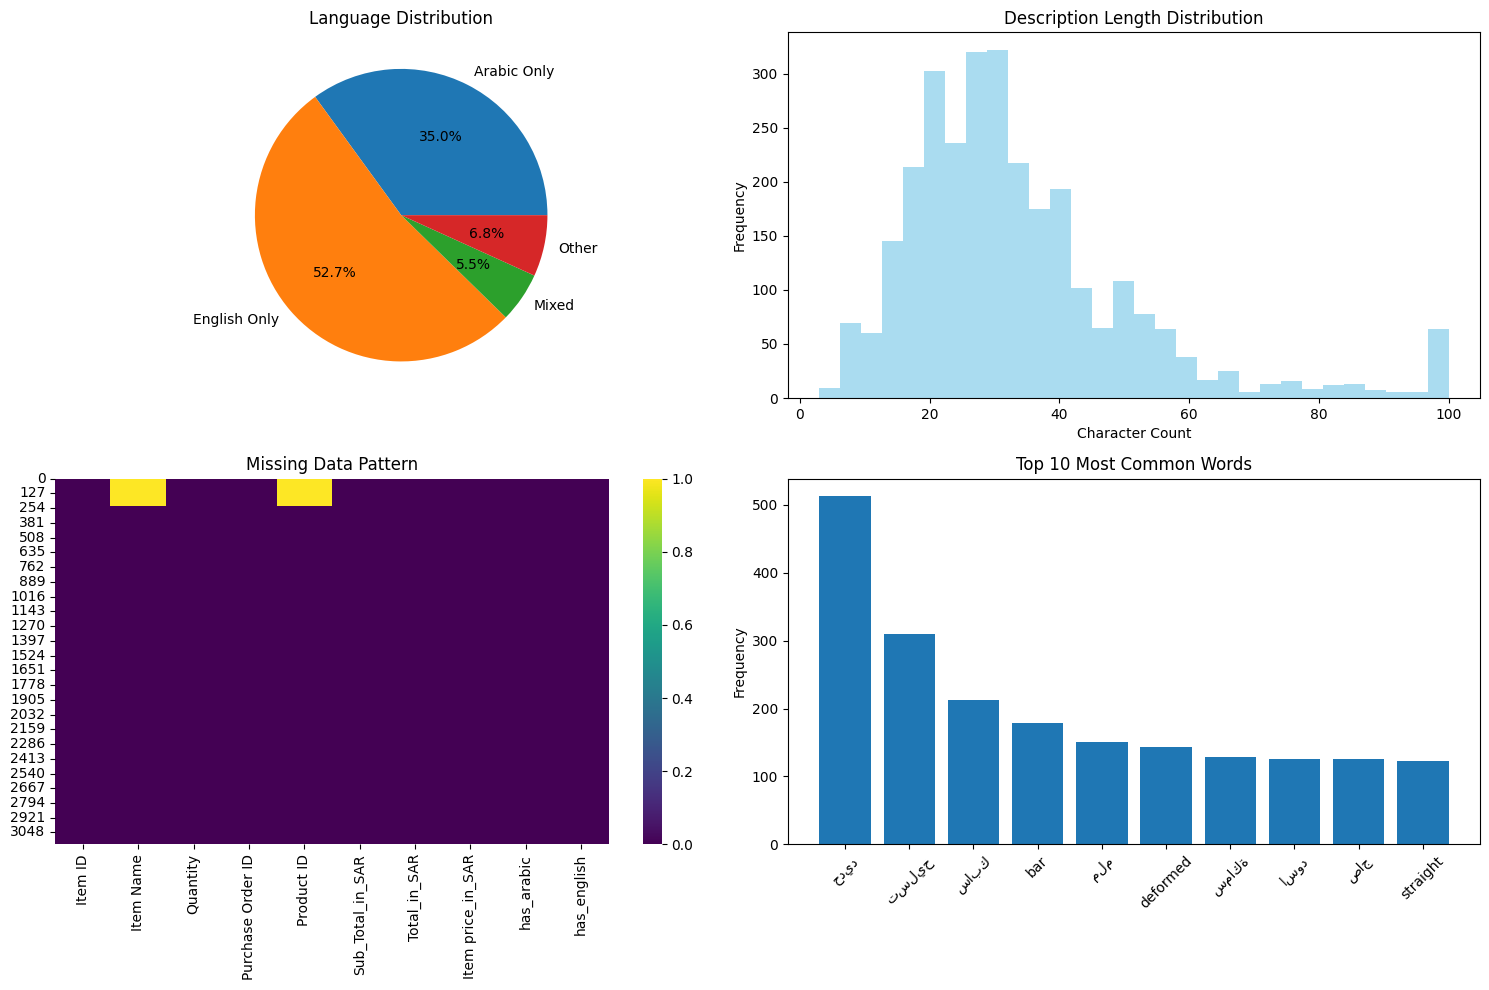

In [77]:
# Create summary visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Language distribution
language_counts = [
    df['has_arabic'].sum(),
    df['has_english'].sum(),
    (df['has_arabic'] & df['has_english']).sum(),
    (~df['has_arabic'] & ~df['has_english']).sum()
]
language_labels = ['Arabic Only', 'English Only', 'Mixed', 'Other']

axes[0,0].pie(language_counts, labels=language_labels, autopct='%1.1f%%')
axes[0,0].set_title('Language Distribution')

# Description length distribution
desc_lengths = df[text_column].str.len().dropna()
axes[0,1].hist(desc_lengths, bins=30, alpha=0.7, color='skyblue')
axes[0,1].set_title('Description Length Distribution')
axes[0,1].set_xlabel('Character Count')
axes[0,1].set_ylabel('Frequency')

# Missing data heatmap
if missing_counts.sum() > 0:
    missing_matrix = df.isnull()
    sns.heatmap(missing_matrix.astype(int), cmap='viridis', ax=axes[1,0])
    axes[1,0].set_title('Missing Data Pattern')
else:
    axes[1,0].text(0.5, 0.5, 'No Missing Data', ha='center', va='center')
    axes[1,0].set_title('Missing Data Pattern')

# Top words visualization (if common words exist)
if len(common_words) > 0:
    top_words = dict(common_words.most_common(10))
    axes[1,1].bar(range(len(top_words)), list(top_words.values()))
    axes[1,1].set_xticks(range(len(top_words)))
    axes[1,1].set_xticklabels(list(top_words.keys()), rotation=45)
    axes[1,1].set_title('Top 10 Most Common Words')
    axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 1.4 Documentation:
## 📄 Data Processing Documentation & Summary

This notebook performed structured data processing for purchase order item categorization. Below is a summary of the actions taken and the rationale behind each step.

---

### 1. **Loading and Initial Cleaning**

- **Data Loading:**  
  The purchase order data was loaded from an Excel file using `pandas.read_excel()`.  
  The initial structure, column names, data types, and memory usage were printed for inspection.

- **Initial Inspection:**  
  - Displayed the first and last 5 rows, and a random sample of 5 rows, to get a sense of the data.
  - Assessed missing values per column and calculated the percentage of missing data.
  - Checked for duplicate rows (none found; all rows are unique).

---

### 2. **Data Cleaning and Preprocessing**

- **Column Removal:**  
  - **'Project ID'** was dropped because it was entirely missing.
  - **'Currency Code'** was dropped after confirming all values were 'SAR' (Saudi Riyal).
  - **'Account ID'** and **'Tax ID'** were dropped as they were either constant or provided no useful information.

- **Currency Handling:**  
  - Created new columns (`Sub_Total_in_SAR`, `Total_in_SAR`) to ensure all monetary values are in SAR, converting from USD where necessary.
  - Dropped the original currency and total columns after conversion.

- **Item Price Calculation:**  
  - Added a new column `Item price_in_SAR` representing the price per item (total divided by quantity).

- **Data Consistency Checks:**  
  - Compared 'Total Bcy' and 'Sub Total Bcy' to identify rows with discrepancies, revealing a consistent tax/fee pattern (about 2.04% difference).
  - Checked missingness in 'Item Name' and 'Product ID', confirming that missing values in these columns always occur together.

- **Product and Item Analysis:**  
  - Analyzed the relationship between 'Product ID' and 'Item Name', finding that a single product ID can map to multiple item names.
  - Counted occurrences of 'Purchase Order ID' and summarized total value per order.
  - Extracted and sorted item prices to identify high-value items.

---

### 3. **Multilingual Text Handling and Content Analysis**

- **Text Column Analysis:**  
  - Analyzed the 'Item Name' column for total, unique, and average description length.
  - Displayed random samples of item descriptions.

- **Language Detection:**  
  - Implemented simple functions to detect Arabic and English content in item descriptions.
  - Added boolean columns (`has_arabic`, `has_english`) to indicate language presence.
  - Counted and reported the number of records in each language category (Arabic only, English only, mixed, or neither).
  - Displayed sample descriptions for each language group.

- **Word Frequency Analysis:**  
  - Extracted and counted the most common words in all descriptions, as well as separately for English-only and Arabic-only records.

---

### 4. **Visualization**

- **Summary Visualizations:**  
  - Pie chart of language distribution.
  - Histogram of description lengths.
  - Heatmap of missing data patterns (if any missing data remained).
  - Bar chart of the top 10 most common words in item descriptions.

---

## **Summary Table of Actions**

| Step                | Action                                                                 | Rationale/Outcome                                      |
|---------------------|------------------------------------------------------------------------|--------------------------------------------------------|
| Data Loading        | Loaded Excel file, checked structure                                   | Ensured correct import and understanding of data       |
| Initial Inspection  | Displayed samples, checked missing/duplicates                          | Assessed data quality and completeness                 |
| Cleaning            | Dropped irrelevant/constant columns                                    | Reduced noise and focused on useful features           |
| Currency Handling   | Standardized all monetary values to SAR                                | Enabled consistent analysis                            |
| Price Calculation   | Added per-item price column                                            | Facilitated price-based analysis                       |
| Consistency Checks  | Compared totals, checked missingness patterns                          | Identified tax/fee patterns and missing data logic     |
| Product/Item Review | Analyzed product-item relationships, order values, item prices         | Understood product granularity and order impact        |
| Text Analysis       | Analyzed description stats, language, and word frequencies             | Prepared for multilingual and content-based modeling   |
| Visualization       | Plotted key distributions and patterns                                 | Enabled quick visual insights                          |

---

## **Conclusion**

All code in this notebook was focused on:
- Loading and inspecting the raw data,
- Cleaning and standardizing the dataset,
- Handling multilingual text,
- Extracting key statistics and patterns,
- Visualizing important aspects of the data.